# Classification with Perceptron Learning Algorithm (PLA)
1. [Setup](#setup)
2. [Load data](#import-data)
3. [Data Preprocessing](#data-preprocessing)
    - [Split Data](#split-data)
    - [Scale Data](#scale-data)
4. [Buid Model](#build-classification-model-with-pla)
5. [Prediction](#prediction)
6. [Evaluate Model](#evaluate-model)
7. [Data Visualization](#data-visualization)
8. [Conclusion](#conclusion)

## Setup

In [120]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Import Data

In [121]:
df = pd.read_csv('../data/movieData.csv')

## EDA

In [122]:
print(f'Data Shape: {df.shape}')
print(f'Data Information: {df.info()}')
print(f'Data Description: {df.describe()}')
print(f'Unique Values in Watched: {df['Watched'].unique()}')
df.head()
print(f"Level of Violence: min={df['LevelOfViolence'].min()}, max={df['LevelOfViolence'].max()}")
print(f"Critics Rating: min={df['CriticsRating'].min()}, max={df['CriticsRating'].max()}")

Data Shape: (13, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LevelOfViolence  13 non-null     int64  
 1   CriticsRating    13 non-null     float64
 2   Watched          13 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 444.0 bytes
Data Information: None
Data Description:        LevelOfViolence  CriticsRating    Watched
count        13.000000      13.000000  13.000000
mean          2.615385       3.138462  -0.230769
std           1.445595       1.267898   1.012739
min           1.000000       1.200000  -1.000000
25%           1.000000       2.100000  -1.000000
50%           3.000000       3.000000  -1.000000
75%           3.000000       4.200000   1.000000
max           5.000000       4.900000   1.000000
Unique Values in Watched: [-1  1]
Level of Violence: min=1, max=5
Critics Rating: min=1.2, max=4.9


### Figure 1: Level of Violence vs. Critics Rating by Watched and Not Watched Movies

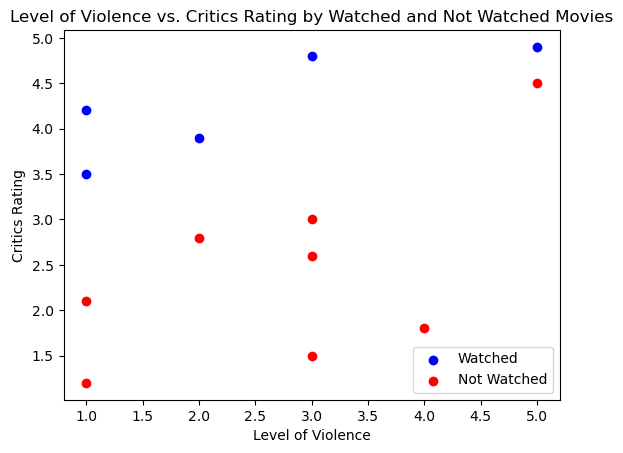

In [123]:
''' Define x and y for watched and not watch '''
# Watched
x_watched = df[df['Watched'] == 1]['LevelOfViolence']
y_watched = df[df['Watched']== 1]['CriticsRating']

# Not Watched
x_not = df[df['Watched'] == -1]['LevelOfViolence']
y_not = df[df['Watched']== -1]['CriticsRating']

''' Creating the plot '''
plt.scatter(x_watched, y_watched, color='blue', label='Watched') # watched movies
plt.scatter(x_not, y_not, color='red', label='Not Watched') # not watched movies

# title, labels, legend
plt.title('Level of Violence vs. Critics Rating by Watched and Not Watched Movies')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.legend(loc='lower right')

plt.show() # display the plot

### Interpretation
The dataset contains 13 rows and 3 columns (**LevelOfViolence**, **CriticsRating**, and **Watched**). 
In each level of violence, all **watched** movies have higher critics rating than **not watched** movies based on **Figure 1**. 

## Data Preprocessing
To avoid **data leakage**, it is best to **split data** before **scale data**.

*Explain*: Scaling before splitting can lead to data leakage, where information from the test set inadvertently influences the training process.

For example, if scaling the entire dataset before splitting, the scaling parameters (e.g., mean and standard deviation for `StandardScaler`) will be influenced by the test data. This can artificially inflate the model's performance because the model has indirectly "seen" the test data during training.

### Split Data
Since this is a supervised learning, specifically classification, a type of machine learning where the model learns from labeled data (features and target). It's best to identify the features (independent variables) and target (dependent variable) before building the model. 


Splitting the dataset into training and testing sets. The training set will be used to train the model, while the testing set will be used for the trained model to predict the classification. 

In [124]:
# Features (independent variables)
X = df[['LevelOfViolence', 'CriticsRating']]

# Target (dependent variable)
y = df['Watched']

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [126]:
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")

Training Set: (10, 2), (10,)
Testing Set: (3, 2), (3,)


In [127]:
print(X_train,'\n',X_test)

    LevelOfViolence  CriticsRating
0                 1            1.2
5                 3            3.0
9                 3            4.8
8                 1            2.1
11                3            1.5
3                 2            3.9
1                 1            3.5
6                 5            4.5
12                3            2.6
2                 1            4.2 
     LevelOfViolence  CriticsRating
7                 4            1.8
10                5            4.9
4                 2            2.8


### Figure 2: Data Visualization
- Right now, `X_train` and `X_test` are **DataFrame** and not **Numpy array**, `iloc`method will be used for indexing. 


- Create a figure with 1 row and 2 columns of subplots. The `figsize` parameter sets the size of the figure to 12 inches by 6 inches.
- Plot the training set of the 1st subplot (`axes[0]`) and testing set of the 2nd subplot (`axes[1]`). The `scatter` function creates a scatter plot with:
    - `X_train.iloc[:,0]` as the x-axis values of training set.
    - `X_train.iloc[:,1]` as the y-axis values of training set.
    - `X_test.iloc[:,0]` as the x-axis values of testing set.
    - `X_test.iloc[:,1]` as the y-axis values of testing set.
    - `c=y_train` and `c=y_test` to color the points based on their class labels of training and testing sets.
    - `edgecolors='k'` to set the edge color of the points to black.
    - `marker='o'` to use circle markers.
    - `label=y_train` and `label=y_test` to label the points (used for the legend).
- Set the title, x-axis label, and y-axis label for both subplots.
- Create a legend for each subplot using the `legend_elements` method of the scatter plot. The `title="Classes"` sets the title of the legend. The `add_artist` method adds the legend to the subplot.
- Adjust the layout of the subplots to prevent overlap using `tight_layout`. Display the figure with the subplots using `show`.

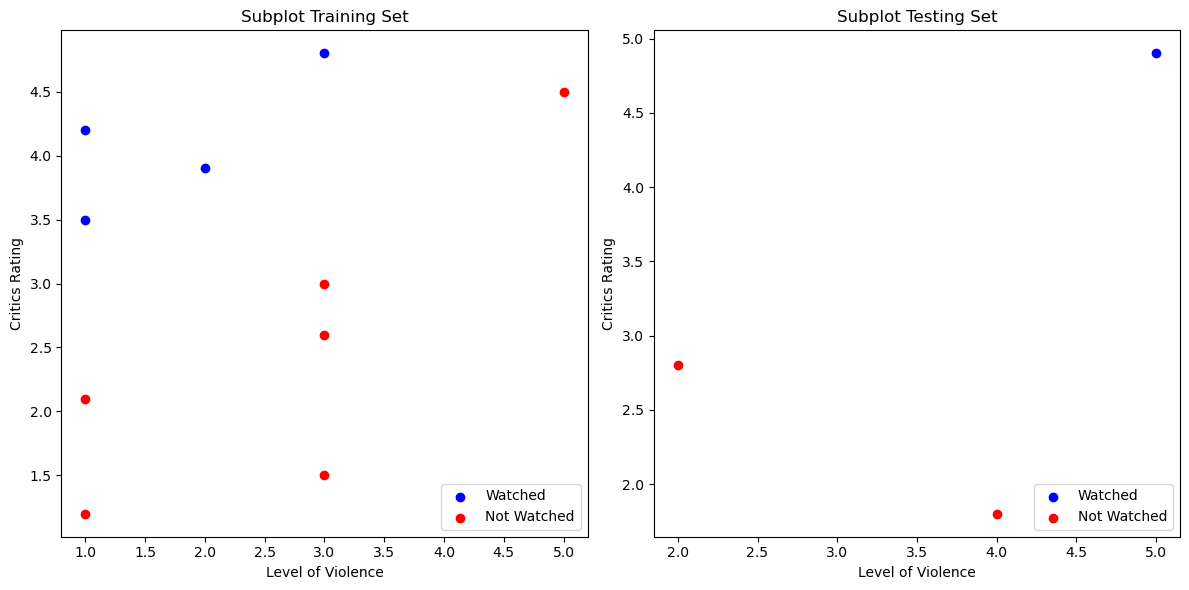

In [128]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot training set
axes[0].scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], color='blue', label='Watched')
axes[0].scatter(X_train[y_train == -1].iloc[:, 0], X_train[y_train == -1].iloc[:, 1], color='red', label='Not Watched')
# scatter_train = axes[0].scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolors='k', marker='o', label=y_train)

axes[0].set_title('Subplot Training Set')
axes[0].set_xlabel('Level of Violence')
axes[0].set_ylabel('Critics Rating')
    # Add legend
# legend1 = axes[0].legend(*scatter_train.legend_elements(), title="Classes")
# axes[0].add_artist(legend1)
axes[0].legend(loc='lower right')


# Plot testing set
axes[1].scatter(X_test[y_test == 1].iloc[:, 0], X_test[y_test == 1].iloc[:, 1], color='blue', label='Watched')
axes[1].scatter(X_test[y_test == -1].iloc[:, 0], X_test[y_test == -1].iloc[:, 1], color='red', label='Not Watched')
# scatter_test = axes[1].scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', marker='o', label=y_test)

axes[1].set_title('Subplot Testing Set')
axes[1].set_xlabel('Level of Violence')
axes[1].set_ylabel('Critics Rating')
    # Add legend
# legend2 = axes[1].legend(*scatter_test.legend_elements(), title="Classes")
# axes[1].add_artist(legend2)
axes[1].legend(loc='lower right')


# Show the plots
plt.tight_layout()
plt.show()

### Scale Data
`LevelOfViolence` and `CriticsRating` are in a similar range, scaling is still a good practice for many machine learning algorithms, including the Perceptron. Scaling ensures that no single feature dominates the learning process due to its larger magnitude. For example, `CriticsRating` has decimal values, while `LevelOfViolence` is integer-based, which could still cause issues.

In [129]:
# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  # Only transform the test data

### Class Labels
The `Perceptron` in sklearn expects class labels to be `[0, 1]` by default, but the **Watched** column has values `[-1, 1]`. While the `Perceptron` can technically work with `[-1, 1]` labels, it’s safer to convert them to `[0, 1]` to avoid any unexpected behavior.

In [130]:
# y = df['Watched'].replace({-1: 0, 1: 1})
# print(y.value_counts())

## Build Classification Model with PLA
Building a Perceptron Learning Algorithm using the [`Perceptron` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) available on [`sklearn Perceptron`](https://scikit-learn.org/stable/modules/linear_model.html#perceptron:~:text=for%20more%20details.-,1.1.14.%20Perceptron,-%23). 

The `Perceptron` is another simple classification algorithm suitable for large scale learning. By default:
- It does not require a learning rate.
- It is not regularized (penalized).
- It updates its model only on mistakes.

In [131]:
pla = Perceptron(max_iter=50, random_state=123)
pla.fit(X_train_scaled, y_train)

Perceptron(max_iter=50, random_state=123)

## Prediction

In [132]:
# quickly evaluate the sklearn model without calling predict()
# print(f"Score: {pla.score(X_test_scaled, y_test)}")

In [133]:
y_pred = pla.predict(X_test_scaled) # predict the test data

In [134]:
print("Predicted labels:", y_pred)

Predicted labels: [-1  1 -1]


## Evaluate Model
Use `accuracy_score()`:
 - When you want to compute accuracy explicitly.
 - When you are working with predictions generated outside of a scikit-learn model.
 - When you want to compare predictions from different models or frameworks.

Use `score()`:
 - When you want a quick evaluation of a scikit-learn model's performance.
 - When you want to use the default evaluation metric for the model (e.g., accuracy for classifiers, R-square for regressors).
 - When you want to avoid manually computing predictions.

In [135]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Number of iterations: {pla.n_iter_}")
print(f"Intercept: {pla.intercept_}")
print(f"Final Weights/Coeffients: {pla.coef_}")
print(f"Coeficient Shape: {pla.coef_.shape}")

Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Number of iterations: 10
Intercept: [-1.]
Final Weights/Coeffients: [[-2.1278981   4.04173487]]
Coeficient Shape: (1, 2)


## Data Visualization
Create a **mesh grid**, a commond technique used to visualize decision boundaries in classification problems.
 - Define the range
 - Create the grid
 - Predict on the grid
 - Plot the Decision Boundary Line (BDL)

### Decision Boundary Plot on Scaled Data

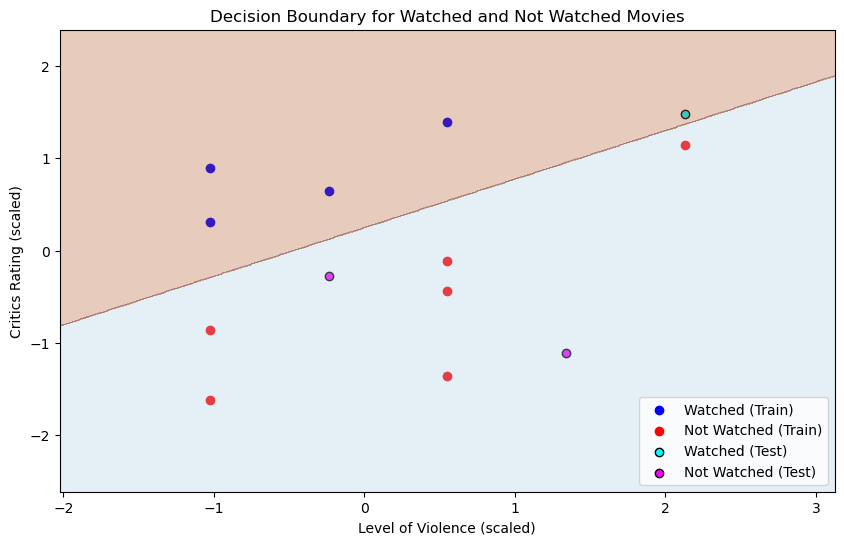

In [136]:
# Scatter plot with decision boundary including all data points
plt.figure(figsize=(10, 6))

# Plot the training set data points
plt.scatter(X_train_scaled[y_train == 1][:, 0], X_train_scaled[y_train == 1][:, 1], color='blue', label='Watched (Train)')
plt.scatter(X_train_scaled[y_train == -1][:, 0], X_train_scaled[y_train == -1][:, 1], color='red', label='Not Watched (Train)')

# Plot the testing set data points
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 1], color='cyan', label='Watched (Test)', edgecolor='k')
plt.scatter(X_test_scaled[y_test == -1][:, 0], X_test_scaled[y_test == -1][:, 1], color='magenta', label='Not Watched (Test)', edgecolor='k')

# Create a mesh to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = pla.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.title('Decision Boundary for Watched and Not Watched Movies')
plt.xlabel('Level of Violence (scaled)')
plt.ylabel('Critics Rating (scaled)')
plt.legend(loc='lower right')
plt.show()

### Decision Boundary Plot on Unscaled Data

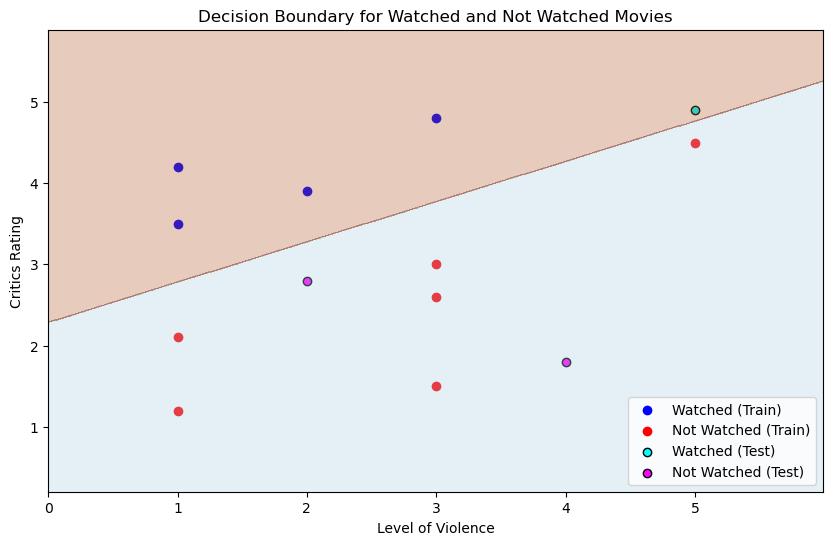

In [137]:
# Scatter plot with decision boundary including all data points
plt.figure(figsize=(10, 6))

# Plot the training set data points
plt.scatter(X_train[y_train == 1]['LevelOfViolence'], X_train[y_train == 1]['CriticsRating'], color='blue', label='Watched (Train)')
plt.scatter(X_train[y_train == -1]['LevelOfViolence'], X_train[y_train == -1]['CriticsRating'], color='red', label='Not Watched (Train)')

# Plot the testing set data points
plt.scatter(X_test[y_test == 1]['LevelOfViolence'], X_test[y_test == 1]['CriticsRating'], color='cyan', label='Watched (Test)', edgecolor='k')
plt.scatter(X_test[y_test == -1]['LevelOfViolence'], X_test[y_test == -1]['CriticsRating'], color='magenta', label='Not Watched (Test)', edgecolor='k')

# Create a mesh to plot the decision boundary
x_min, x_max = X['LevelOfViolence'].min() - 1, X['LevelOfViolence'].max() + 1
y_min, y_max = X['CriticsRating'].min() - 1, X['CriticsRating'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Scale the mesh grid points using the same scaler
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the mesh grid points to DataFrame with the same column names before scaling
mesh_points_df = pd.DataFrame(mesh_points, columns=['LevelOfViolence', 'CriticsRating']) 

mesh_points_scaled = scaler.transform(mesh_points_df)

# Predict the function value for the whole grid
Z = pla.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.title('Decision Boundary for Watched and Not Watched Movies')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.legend(loc='lower right')
plt.show()

### Decision Boundary Plot

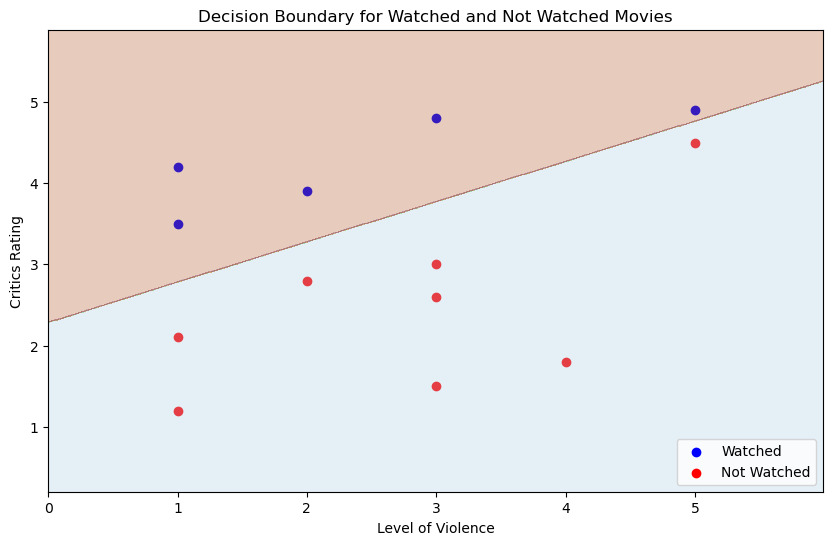

In [138]:
# Scatter plot with decision boundary including all data points
plt.figure(figsize=(10, 6))

# Watched
x_watched = df[df['Watched'] == 1]['LevelOfViolence']
y_watched = df[df['Watched']== 1]['CriticsRating']

# Not Watched
x_not = df[df['Watched'] == -1]['LevelOfViolence']
y_not = df[df['Watched']== -1]['CriticsRating']

''' Creating the plot '''
plt.scatter(x_watched, y_watched, color='blue', label='Watched') # watched movies
plt.scatter(x_not, y_not, color='red', label='Not Watched') # not watched movies

# Create a mesh to plot the decision boundary
x_min, x_max = X['LevelOfViolence'].min() - 1, X['LevelOfViolence'].max() + 1
y_min, y_max = X['CriticsRating'].min() - 1, X['CriticsRating'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Scale the mesh grid points using the same scaler
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Convert the mesh grid points to DataFrame with the same column names before scaling
mesh_points_df = pd.DataFrame(mesh_points, columns=['LevelOfViolence', 'CriticsRating']) 

mesh_points_scaled = scaler.transform(mesh_points_df)

# Predict the function value for the whole grid
Z = pla.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.title('Decision Boundary for Watched and Not Watched Movies')
plt.xlabel('Level of Violence')
plt.ylabel('Critics Rating')
plt.legend(loc='lower right')
plt.show()

## Conclusion

**Report on Perceptron Learning Algorithm (PLA) Model**

**Purpose of the Model**

The purpose of the Perceptron Learning Algorithm (PLA) model is to classify movies based on their level of violence and critics' ratings into two categories: "Watched" and "Not Watched". The model aims to find a linear decision boundary that separates these two classes.

**Model Summary**
- **Accuracy**: The model achieved an accuracy of 1.0, indicating perfect classification on the test set.
- **Classification Report**:
 - **Precision**: 1.00 for both classes
 - **Recall**: 1.00 for both classes
 - **F1-Score**: 1.00 for both classes
 - **Support**: 2 for class -1 (Not Watched), 1 for class 1 (Watched)
 - **Macro Average**: 1.00 for precision, recall, and f1-score
 - **Weighted Average**: 1.00 for precision, recall, and f1-score

**Model Parameters**
 - **Number of Iterations**: 10
 - **Intercept (Bias)**: -1.0
 - **Final Weights (Coefficients)**:
  - Weight for `LevelOfViolence`: -2.1278981
  - Weight for `CriticsRating`: 4.04173487
 - **Coefficient Shape**: (1, 2)

**Decision Boundary**

The decision boundary is a linear equation derived from the model's weights and intercept. The equation of the decision boundary is given by:

**[ w_0 + w_1 \cdot x_1 + w_2 \cdot x_2 = 0 ]**

Where:

- ( w_0 ) is the intercept (bias)
- ( w_1 ) and ( w_2 ) are the weights for `LevelOfViolence` and `CriticsRating`, respectively
- ( x_1 ) and ( x_2 ) are the feature values for `LevelOfViolence` and `CriticsRating`, respectively
Using the final weights and intercept: **[ -1.0 + (-2.1278981) \cdot x_1 + 4.04173487 \cdot x_2 = 0 ]**

To plot the decision boundary:

1. Solve for ( x_2 ) in terms of ( x_1 ): [ x_2 = \frac{1.0 + 2.1278981 \cdot x_1}{4.04173487} ]

2. Create a range of values for ( x_1 ) and compute the corresponding ( x_2 ) values using the above equation.